#Model Evaluation & Hyperparameter Tuning
<h2> Demo 3: Perform Grid Search Using Python </h2>

In this demo, you will learn how to apply GridSearch to find optimal hyperparameters.

## Problem Statement

Phishing websites are hard to detect and problematic when payments are included. These websites cause huge loss to both cusumers and business. Various features were captured from multiple sources aim is to classify them as __phishing, legitimate or suspicious__.

# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Data Analysis

In [2]:
data=pd.read_csv('PhishingData.csv')

In [3]:
data.head()

,id,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,1,-1,1,-1,-1,1,1,1,0,0
1,2,-1,-1,-1,-1,-1,0,1,1,1,1
2,3,1,-1,0,0,-1,0,-1,1,0,1
3,4,1,0,1,-1,-1,0,1,1,0,0
4,5,-1,-1,1,-1,0,0,-1,1,0,1


<div style="background-color:##EDF9FF">
  <ul><li><h3> Testing For Null Values</h3></li></ul>
</div>

In [4]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
id,0,0.0
SFH,0,0.0
popUpWidnow,0,0.0
SSLfinal_State,0,0.0
Request_URL,0,0.0
URL_of_Anchor,0,0.0
web_traffic,0,0.0
URL_Length,0,0.0
age_of_domain,0,0.0
having_IP_Address,0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 1353 non-null   int64
 1   SFH                1353 non-null   int64
 2   popUpWidnow        1353 non-null   int64
 3   SSLfinal_State     1353 non-null   int64
 4   Request_URL        1353 non-null   int64
 5   URL_of_Anchor      1353 non-null   int64
 6   web_traffic        1353 non-null   int64
 7   URL_Length         1353 non-null   int64
 8   age_of_domain      1353 non-null   int64
 9   having_IP_Address  1353 non-null   int64
 10  Result             1353 non-null   int64
dtypes: int64(11)
memory usage: 116.4 KB


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has no null values.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [6]:
target_ratio=pd.DataFrame({'Counts':data.Result.value_counts(),'Percentage':data.Result.value_counts()/len(data)})
target_ratio


,Counts,Percentage
Result,,
-1,702,0.518847
1,548,0.405026
0,103,0.076127


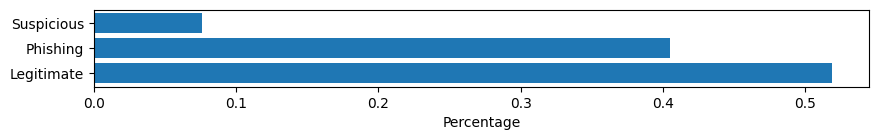

In [7]:
plt.figure(figsize = (10,1))
plt.barh(['Legitimate','Phishing','Suspicious'], target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

<div style="background-color:##EDF9FF">
  <ul><li><h3>Selecting Features</h3></li></ul>
</div>

In [8]:
X=data.drop(['Result','id'],axis=1)
y=data.Result

# Grid Search 

Here are the parameters for <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV'>GridSearchCV</a>:
- __estimator__: `model`
- __param_grid__: `dist or list of dictionaries` Parameters to the estimator/model
- __scoring__: `string,callable, list/tuple, dict or None, default: None` Evaluating metrics
- __cv__: `int or callable` Cross validation

In [9]:
params = { "criterion" : ["gini", "entropy"], "n_estimators": [100, 150, 200,300]}
rf_gsv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=3,scoring='accuracy')
rf_gsv.fit(X,y)

C:\Users\akram\AppData\Roaming\Python\Python310\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='accuracy')

<div style="background-color:##EDF9FF">
  <ul><li><h3>Results sorted by rank</h3></li></ul>
</div>

In [10]:
results=pd.DataFrame(rf_gsv.cv_results_).sort_values('rank_test_score')
print(results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.133336      0.005855         0.008671        0.000471   
1       0.185714      0.001784         0.012030        0.000392   
2       0.248877      0.003348         0.014206        0.000656   
3       0.374370      0.010798         0.020847        0.000941   
5       0.189780      0.001424         0.010752        0.000338   
7       0.376093      0.002910         0.020409        0.000652   
4       0.123383      0.000833         0.007866        0.000460   
6       0.247477      0.001770         0.015032        0.001090   

  param_criterion  param_n_estimators  \
0            gini                 100   
1            gini                 150   
2            gini                 200   
3            gini                 300   
5         entropy                 150   
7         entropy                 300   
4         entropy                 100   
6         entropy                 200   

                          

In [11]:
rf_gsv.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [12]:
rf_gsv.best_estimator_

RandomForestClassifier()

*__Conclusion__*: In this demonstration, we have learned how to use GridSearch to find optimal hyperparameters.